In [1]:
import pandas as pd
data=pd.read_csv('../input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv')

In [2]:
data.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10039,0,9910,129,0.00,98.72,1.28,100896618
1,Andhra Pradesh,2319869,62,2305076,14731,0.00,99.36,0.63,128500364
2,Arunachal Pradesh,64504,1,64207,296,0.00,99.54,0.46,658019
3,Assam,724225,4,716235,7986,0.00,98.90,1.10,290492
4,Bihar,830702,43,818403,12256,0.01,98.52,1.48,40100376


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [4]:
data.isnull().sum()

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.shape

(36, 9)

In [7]:
data.tail()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
31,Telengana,792842,407,788324,4111,0.05,99.43,0.52,69599762
32,Tripura,100887,0,99964,923,0.00,99.09,0.91,1646050
33,Uttar Pradesh,2078519,874,2054127,23518,0.04,98.83,1.13,1158040
34,Uttarakhand,437789,477,429619,7693,0.11,98.13,1.76,85002417
35,West Bengal,2019058,378,1997477,21203,0.02,98.93,1.05,32199722


In [8]:
data_cat=data['State/UTs']
data_cat.head()

0    Andaman and Nicobar
1         Andhra Pradesh
2      Arunachal Pradesh
3                  Assam
4                  Bihar
Name: State/UTs, dtype: object

In [9]:
data_cat=pd.get_dummies(data_cat,drop_first=True)
data_cat.head()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,Gujarat,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telengana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data_cat.shape

(36, 35)

In [11]:
data_num=data.drop(columns='State/UTs',axis=1)
data_num.head()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,10039,0,9910,129,0.00,98.72,1.28,100896618
1,2319869,62,2305076,14731,0.00,99.36,0.63,128500364
2,64504,1,64207,296,0.00,99.54,0.46,658019
3,724225,4,716235,7986,0.00,98.90,1.10,290492
4,830702,43,818403,12256,0.01,98.52,1.48,40100376


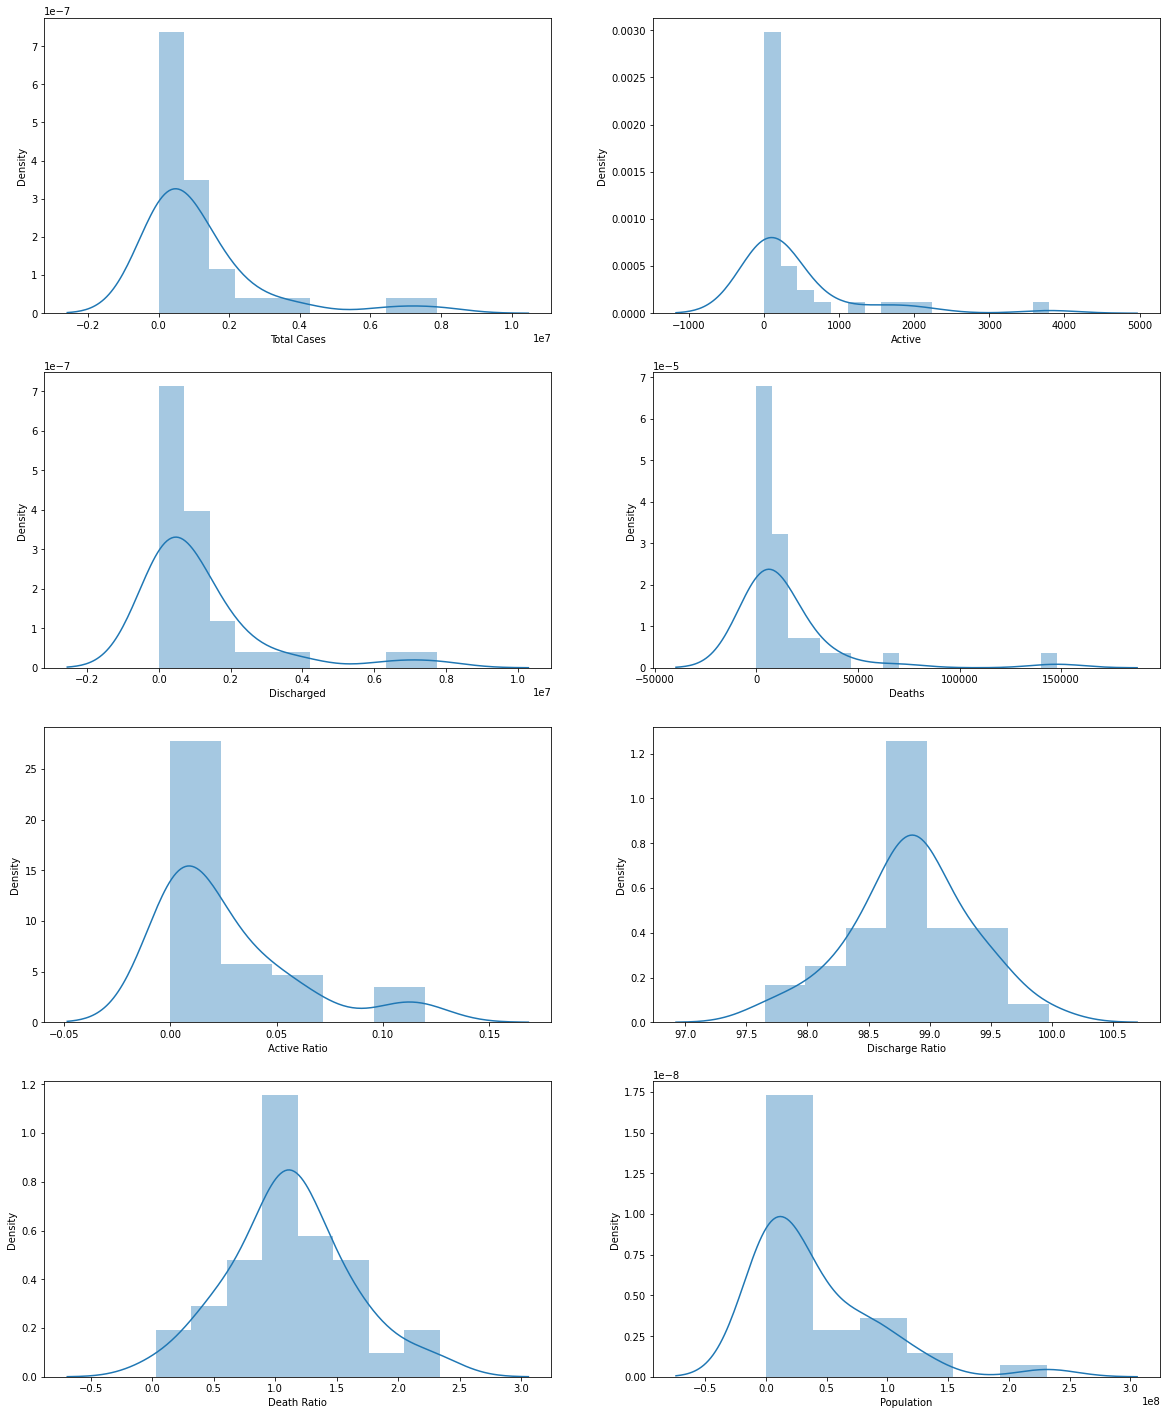

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,25))
for i, var in enumerate(data_num.columns):
    plt.subplot(4,2,i+1)
    sns.distplot(data_num[var])

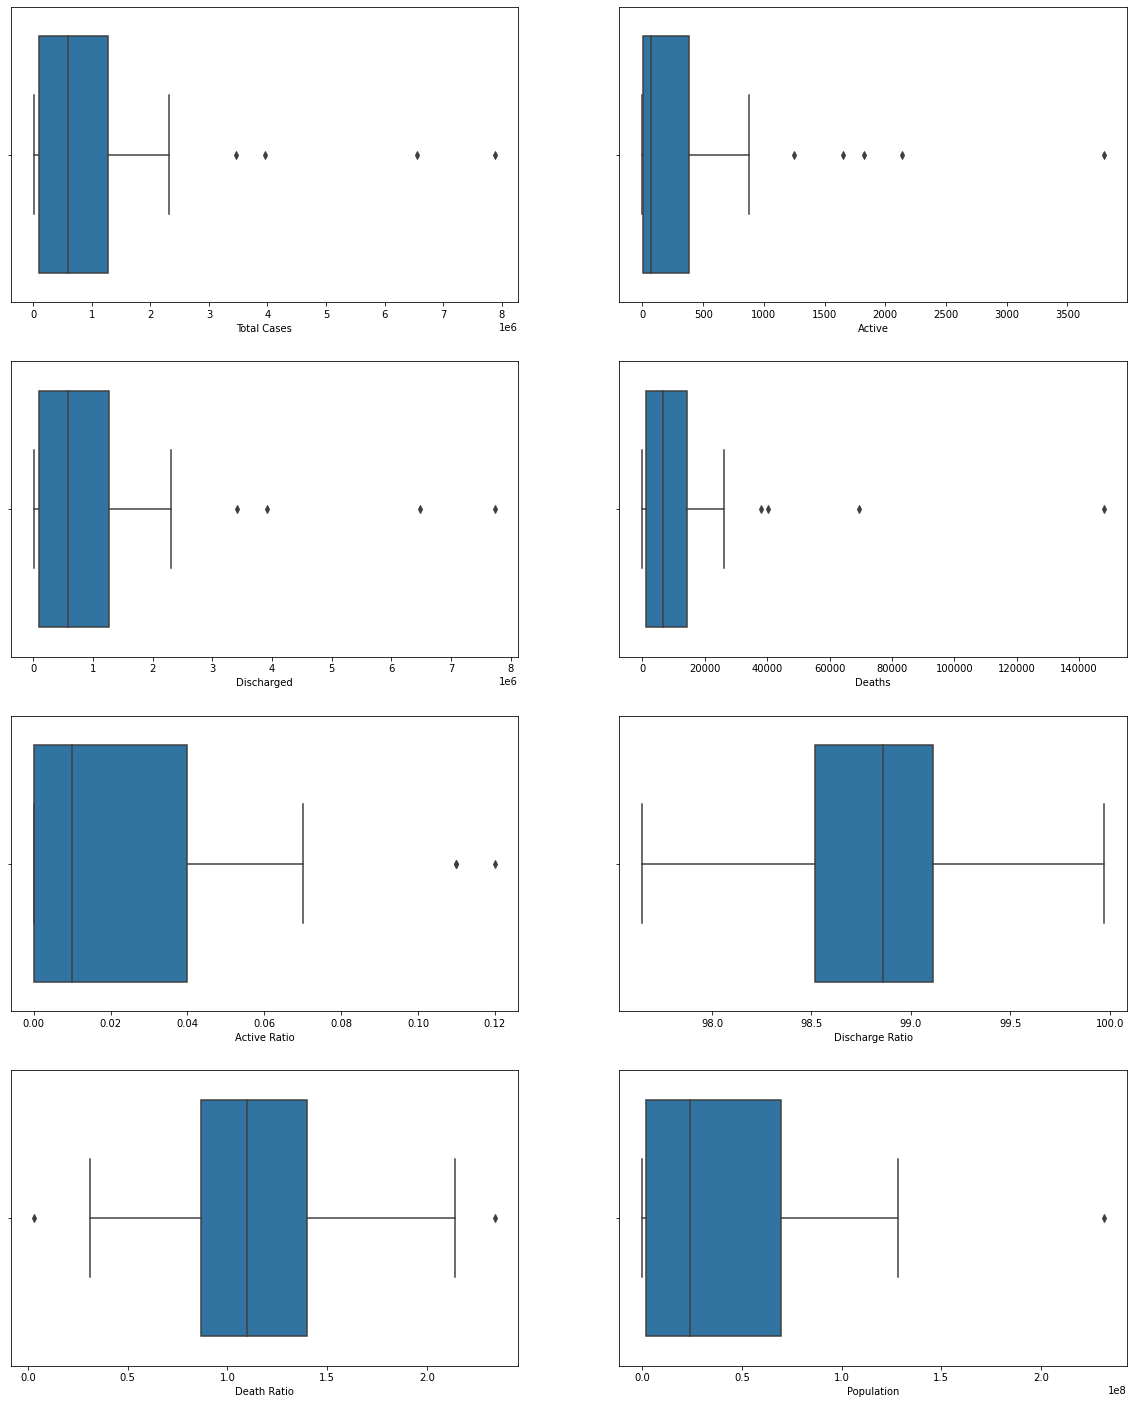

In [13]:
plt.figure(figsize=(20,25))
for i, var in enumerate(data_num.columns):
    plt.subplot(4,2,i+1)
    sns.boxplot(data_num[var])

In [14]:
data_num.shape

(36, 8)

In [15]:
df=pd.merge(data_num,data_cat,right_index=True,left_index=True)
df.head()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population,Andhra Pradesh,Arunachal Pradesh,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telengana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,10039,0,9910,129,0.00,98.72,1.28,100896618,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2319869,62,2305076,14731,0.00,99.36,0.63,128500364,1,0,...,0,0,0,0,0,0,0,0,0,0
2,64504,1,64207,296,0.00,99.54,0.46,658019,0,1,...,0,0,0,0,0,0,0,0,0,0
3,724225,4,716235,7986,0.00,98.90,1.10,290492,0,0,...,0,0,0,0,0,0,0,0,0,0
4,830702,43,818403,12256,0.01,98.52,1.48,40100376,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
x=df.drop(columns='Deaths',axis=1)
y=df['Deaths']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [18]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
y_pred=xgb.predict(x_test)
y_pred

array([22607.814 , 11002.269 , 11326.304 ,  1211.8274,  1251.7542,
        7924.3447, 41093.434 , 22758.898 ], dtype=float32)

In [20]:
from sklearn.metrics import r2_score,mean_absolute_error
mean_absolute_error(y_test,y_pred)

1230.716552734375